In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import seaborn.apionly as sns

In [14]:
url = "https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes"
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

In [5]:
tables= soup.find_all('table',{'class':'wikitable plainrowheaders wikiepisodetable'})
data = []
columns = []
for table in tables:
    rows = table.find_all('tr')
    if(tables.index(table)==0):
        columns = [v.text.replace('\u200a[20]','') for v in rows[0].find_all('th')]

    for i in range(1, len(rows)):
        ths = rows[i].find_all('th',{'scope':'row'})
        valuex = [th.text for th in ths]
        tds = rows[i].find_all('td')
        value = []
        for td in tds:
            if(td.find('sup')):
                value.append(td.text[0:5].replace('[',''))
            else:
                value.append(td.text)
        #value = [td.text for td in tds]
        valuey = valuex + value
        #print(valuey)
        data.append(valuey)
    if(tables.index(table)==7):
        break

In [6]:
save_dir = 'E://Data Science/Data Science Lab/assignment/game_of_thrones_data.csv'

In [7]:
df = pd.DataFrame(data, columns = columns)
df.to_csv(save_dir, encoding='utf-8', index=False)

In [8]:
game_of_thrones_df= pd.read_csv(save_dir)
game_of_thrones_df.head()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58


### Formatting Table Header Names

In [9]:
game_of_thrones_df=game_of_thrones_df.rename(columns={"No.overall":"Number_Overall","No. inseason":"Number_in_season","U.S. viewers(millions)":"Viewers","Directed by":"Director","Written by":"Writer","Original air date":"Air_Date"})
game_of_thrones_df.head()

,Number_Overall,Number_in_season,Title,Director,Writer,Air_Date,Viewers
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58


In [10]:
game_of_thrones_df= game_of_thrones_df.replace({"Story by : David Benioff & D. B. Weiss Teleplay by : Jane Espenson and David Benioff & D. B. Weiss":"David Benioff & D. B. Weiss"})
game_of_thrones_df.head()

,Number_Overall,Number_in_season,Title,Director,Writer,Air_Date,Viewers
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58


In [11]:
print(game_of_thrones_df.shape)
print(game_of_thrones_df.columns)

(73, 7)
Index(['Number_Overall', 'Number_in_season', 'Title', 'Director', 'Writer',
       'Air_Date', 'Viewers'],
      dtype='object')


### Bar chart of episode against views

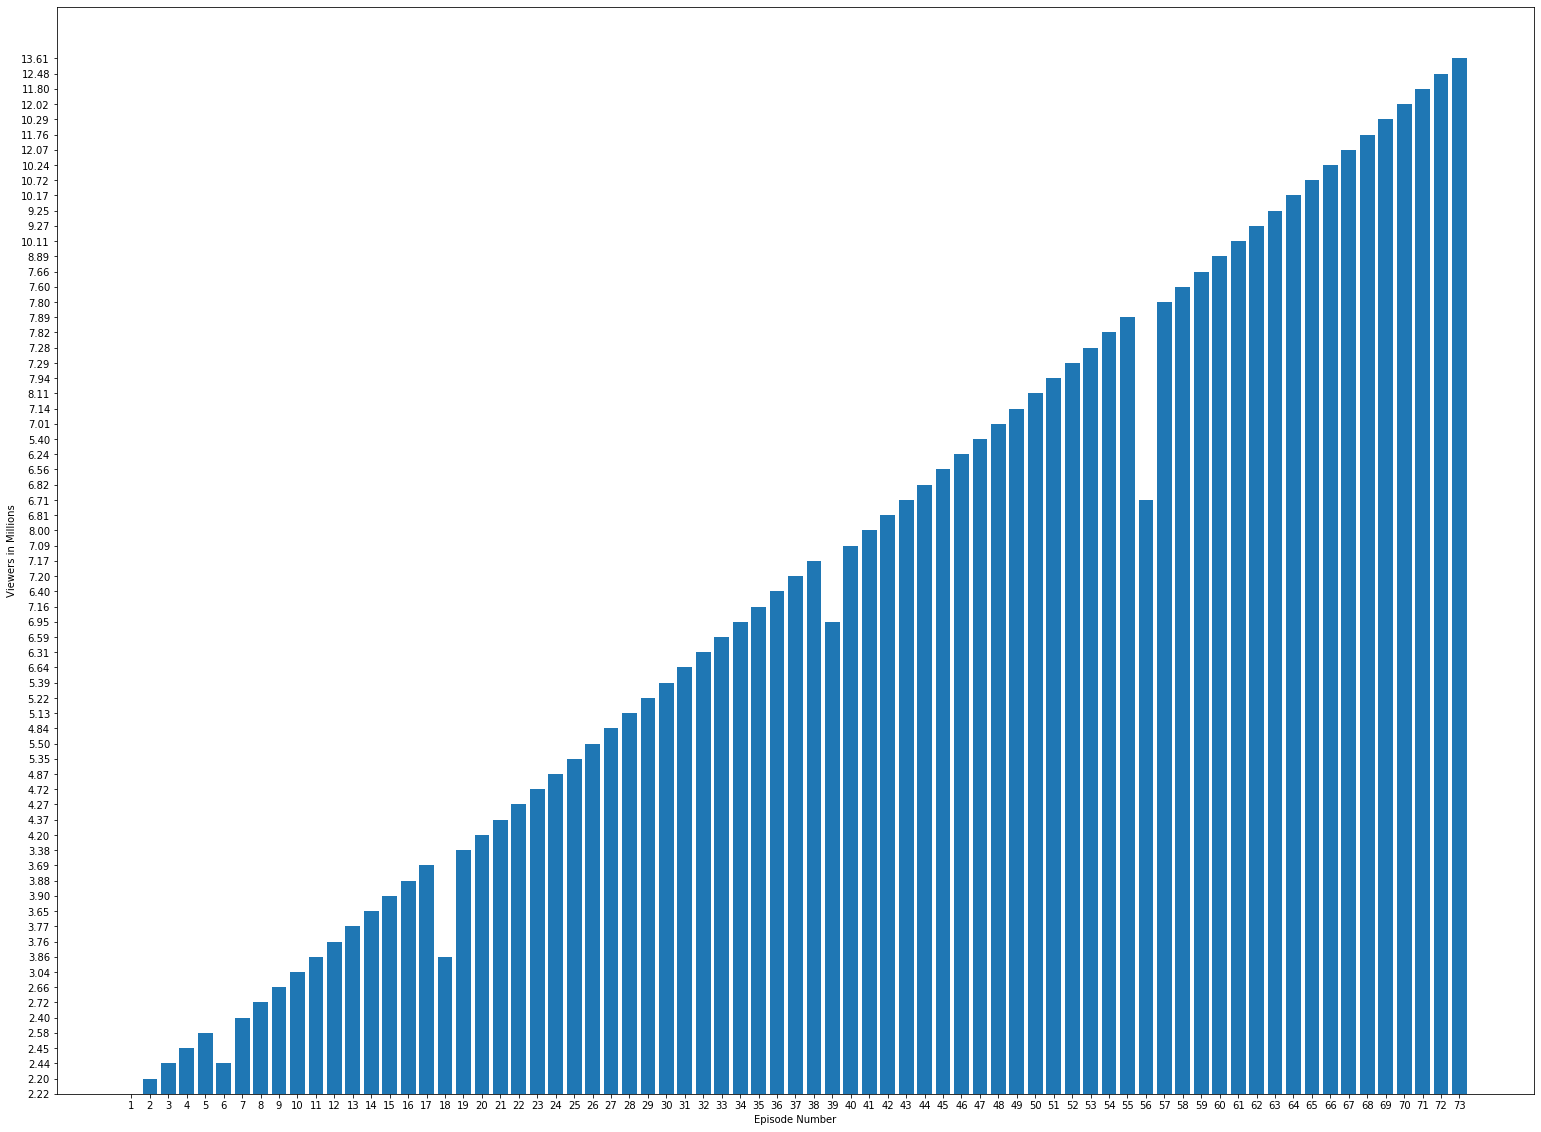

In [25]:
x = df['No.overall']
y = df['U.S. viewers(millions)']
fig = plt.figure(figsize=(90,20))
ax1 = fig.add_subplot(131)
ax1.bar(x,y)
ax1.set_xlabel('Episode Number')
ax1.set_ylabel('Viewers in Millions')
plt.show()

In [28]:
game_of_thrones_df['Number_in_season'].describe()

count    73.000000
mean      5.191781
std       2.821827
min       1.000000
25%       3.000000
50%       5.000000
75%       7.000000
max      10.000000
Name: Number_in_season, dtype: float64

In [29]:
season = []
count = 0
for x in df.itertuples():
    if(x._2 == '1'):
        count += 1
    season.append(count)

In [30]:
game_of_thrones_df['Season'] = season
game_of_thrones_df

,Number_Overall,Number_in_season,Title,Director,Writer,Air_Date,Viewers,Season
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22,1
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20,1
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44,1
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45,1
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58,1
...,...,...,...,...,...,...,...,...
68,69,2,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,"April 21, 2019 (2019-04-21)",10.29,8
69,70,3,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019 (2019-04-28)",12.02,8
70,71,4,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,"May 5, 2019 (2019-05-05)",11.80,8
71,72,5,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019 (2019-05-12)",12.48,8


73


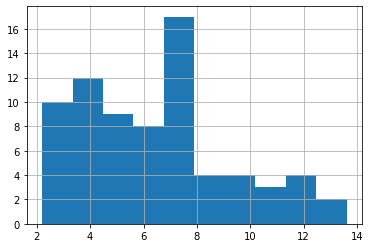

In [12]:
print(len(game_of_thrones_df['Viewers']))
game_of_thrones_df['Viewers'].hist()

In [15]:
export_csv = df.to_csv (r'DSLAB_GOT_WIKI.csv', index = None, header=True)

### Average Viewers count in millions for directors

In [31]:
group_dir = game_of_thrones_df.groupby('Director').Viewers.mean()
group_dir

Director
Alan Taylor                     4.517143
Alex Graves                     6.230000
Alik Sakharov                   5.717500
Brian Kirk                      2.490000
D. B. Weiss                     6.640000
Daniel Minahan                  3.240000
Daniel Sackheim                 7.550000
David Benioff                   4.720000
David Benioff & D. B. Weiss    13.610000
David Nutter                    7.475556
David Petrarca                  3.775000
Jack Bender                     7.300000
Jeremy Podeswa                  8.368333
Mark Mylod                      7.908333
Matt Shakman                   10.445000
Michael Slovis                  7.405000
Michelle MacLaren               6.020000
Miguel Sapochnik                8.910000
Neil Marshall                   5.165000
Tim Van Patten                  2.210000
Name: Viewers, dtype: float64

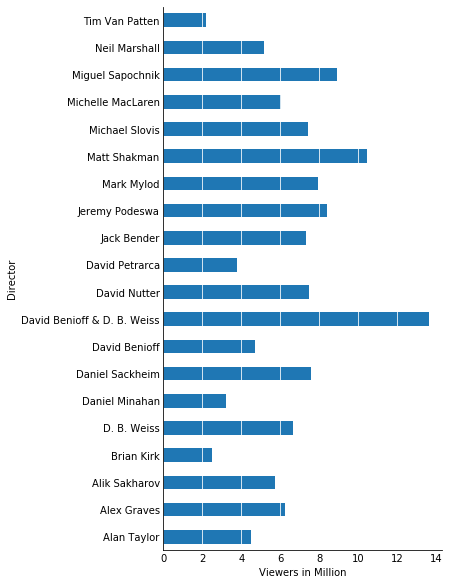

In [17]:
plt.figure(figsize = (5,10))
ax = plt.gca()
group_dir.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
plt.xlabel("Viewers in Million")
ax.tick_params(axis='both', which='both',length=0)
sns.despine()

### Average viewers count in Million for writers

In [19]:
group_writer = game_of_thrones_df.groupby('Writer').Viewers.mean()
group_writer

Writer
Bryan Cogman                   6.526364
Dave Hill                      9.147500
David Benioff & D. B. Weiss    6.534510
George R. R. Martin            4.312500
Vanessa Taylor                 3.933333
Name: Viewers, dtype: float64

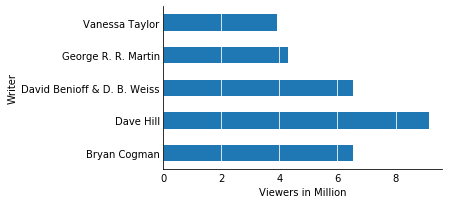

In [20]:
plt.figure(figsize = (5,3))
ax = plt.gca()
group_writer.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
plt.xlabel("Viewers in Million")
ax.tick_params(axis='both', which='both',length=0)
sns.despine()

### Gradual increase in viewers count with the release of each episodes

Text(0, 0.5, 'Number of Viewers')

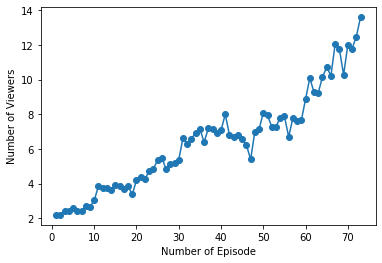

In [21]:
sub_data = game_of_thrones_df[['Number_Overall','Viewers']]
data_temp = sub_data.sort_values('Number_Overall')
plt.plot(data_temp.Number_Overall, data_temp.Viewers, 'o-')
plt.xlabel("Number of Episode")
plt.ylabel("Number of Viewers")

In [36]:
writer_sum = game_of_thrones_df.groupby('Writer')['Viewers'].sum()
writer_mean = game_of_thrones_df.groupby('Writer')['Viewers'].mean()

Text(0.5, 0, 'Average Viewers')

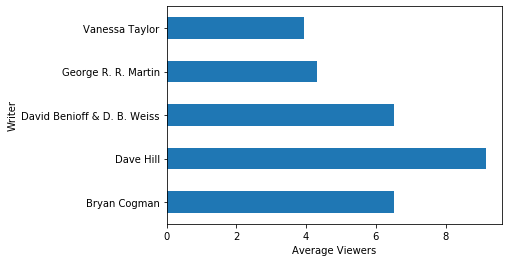

In [37]:
writer_mean.plot(kind='barh')
plt.xlabel('Average Viewers')

Text(0.5, 0, 'Number of episodes')

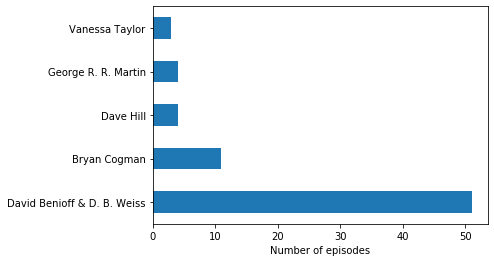

In [38]:
writer_ssn = game_of_thrones_df['Writer'].value_counts()
writer_ssn.plot(kind='barh')
plt.xlabel('Number of episodes')

#### We can see that even though 'David Benioff &D.B. Weiss' wrote the most number of episodes, 'Dave Hill' had the most average views

It also shows the David Benioff & D.B. Weiss are the most successful directors in the whole run and Dave Hill is the most successful writer in the whole run